# Определение выгодного тарифа для телеком компании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Таблица-Calls" data-toc-modified-id="Таблица-Calls-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Таблица Calls</a></span></li><li><span><a href="#Таблица-Sessions" data-toc-modified-id="Таблица-Sessions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица Sessions</a></span></li><li><span><a href="#Таблица-Messages" data-toc-modified-id="Таблица-Messages-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Таблица Messages</a></span></li><li><span><a href="#Таблица-Tariffs" data-toc-modified-id="Таблица-Tariffs-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Таблица Tariffs</a></span></li><li><span><a href="#Таблица-Users" data-toc-modified-id="Таблица-Users-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Таблица Users</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Подготовка-данных-для-новой-таблицы" data-toc-modified-id="Подготовка-данных-для-новой-таблицы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка данных для новой таблицы</a></span></li></ul></li><li><span><a href="#Анализ-данных-и-подсчёт-выручки" data-toc-modified-id="Анализ-данных-и-подсчёт-выручки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных и подсчёт выручки</a></span><ul class="toc-item"><li><span><a href="#Количество-звонков" data-toc-modified-id="Количество-звонков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество звонков</a></span></li><li><span><a href="#Продолжительность-звонков" data-toc-modified-id="Продолжительность-звонков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Продолжительность звонков</a></span></li><li><span><a href="#Количество-сообщений" data-toc-modified-id="Количество-сообщений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Количество сообщений</a></span></li><li><span><a href="#Количество-потраченного-трафика" data-toc-modified-id="Количество-потраченного-трафика-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Количество потраченного трафика</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Общая информация

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  
  
**Описание тарифов**  
  
*Тариф «Смарт»*  
  
- Ежемесячная плата: 550 рублей  
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
  
Стоимость услуг сверх тарифного пакета:  
  
- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
- сообщение: 3 рубля  
- 1 Гб интернет-трафика: 200 рублей  
  
*Тариф «Ультра»*

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
  
Стоимость услуг сверх тарифного пакета:  
  
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

### Описание данных

**Таблица` users`:**

`user_id` — уникальный идентификатор пользователя  
`first_name` — имя пользователя  
`last_name` — фамилия пользователя  
`age` — возраст пользователя (годы)  
`reg_date` — дата подключения тарифа (день, месяц, год)  
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
`city` — город проживания пользователя  
`tariff` — название тарифного плана  
  
**Таблица `calls`:**

`id` — уникальный номер звонка  
`call_date` — дата звонка  
`duration` — длительность звонка в минутах  
`user_id` — идентификатор пользователя, сделавшего звонок  
  
**Таблица `messages`:**  
  
`id` — уникальный номер сообщения  
`message_date` — дата сообщения  
`user_id` — идентификатор пользователя, отправившего сообщение  
  
**Таблица `sessions`:**

`id` — уникальный номер сессии  
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)  
`session_date` — дата интернет-сессии  
`user_id` — идентификатор пользователя  
  
**Таблица `tariffs`:**  
  
`tariff_name` — название тарифа  
`rub_monthly_fee` — ежемесячная абонентская плата в рублях  
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату  
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату  
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)  
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета  
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    sessions = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except:
    calls = pd.read_csv('calls.csv')
    sessions = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')

In [3]:
def primary_analysis(df, head=5, hist=None):
    if hist == None:
        return df.head(head), df.info()
    else:
        return df.head(head), df.info(), df.hist(hist)

### Таблица Calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


(       id   call_date  duration  user_id
 0  1000_0  2018-07-25      0.00     1000
 1  1000_1  2018-08-17      0.00     1000
 2  1000_2  2018-06-11      2.85     1000
 3  1000_3  2018-09-21     13.80     1000
 4  1000_4  2018-12-15      5.18     1000,
 None,
 array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object))

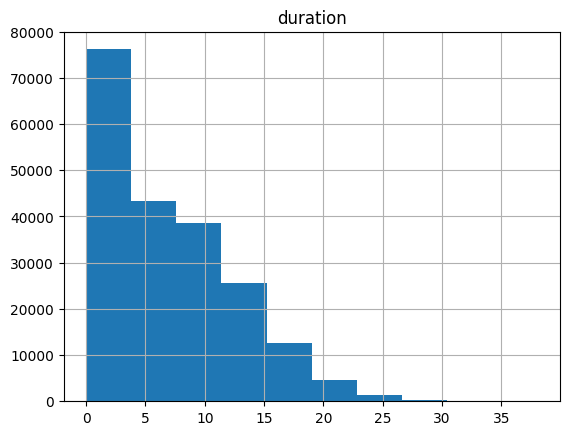

In [4]:
primary_analysis(calls, 5, 'duration')

### Таблица Sessions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


(   Unnamed: 0      id  mb_used session_date  user_id
 0           0  1000_0   112.95   2018-11-25     1000
 1           1  1000_1  1052.81   2018-09-07     1000
 2           2  1000_2  1197.26   2018-06-25     1000
 3           3  1000_3   550.27   2018-08-22     1000
 4           4  1000_4   302.56   2018-09-24     1000,
 None,
 array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object))

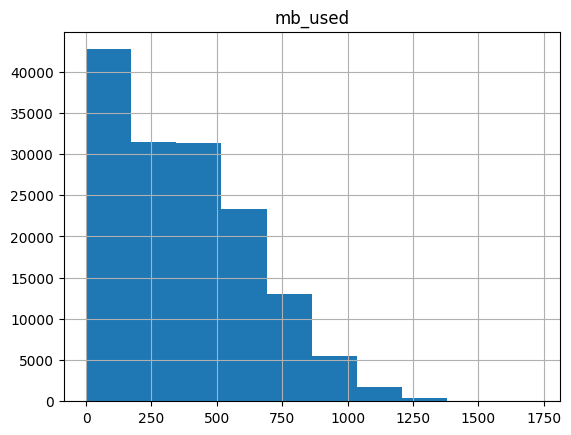

In [5]:
primary_analysis(sessions, 5, 'mb_used')

### Таблица Messages

In [6]:
primary_analysis(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


(       id message_date  user_id
 0  1000_0   2018-06-27     1000
 1  1000_1   2018-10-08     1000
 2  1000_2   2018-08-04     1000
 3  1000_3   2018-06-16     1000
 4  1000_4   2018-12-05     1000,
 None)

### Таблица Tariffs

In [7]:
primary_analysis(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


(   messages_included  mb_per_month_included  minutes_included  \
 0                 50                  15360               500   
 1               1000                  30720              3000   
 
    rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
 0              550         200                3               3       smart  
 1             1950         150                1               1       ultra  ,
 None)

### Таблица Users

In [8]:
primary_analysis(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


(   user_id  age churn_date         city first_name  last_name    reg_date  \
 0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
 1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
 2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
 3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
 4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   
 
   tariff  
 0  ultra  
 1  smart  
 2  smart  
 3  ultra  
 4  ultra  ,
 None)

## Предобработка данных

### Преобразование типов данных

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

users['churn_date'] = pd.to_datetime(users['churn_date'])

calls['call_date'] = pd.to_datetime(calls['call_date'])

messages['message_date'] = pd.to_datetime(messages['message_date'])

sessions['session_date'] = pd.to_datetime(sessions['session_date'])

В столбце `duration` датафрейма `calls` значения дробные. Округлю значения столбца `duration` вверх и приведу к типу `int`

In [10]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

### Добавление новых столбцов

Удалю столбец `Unnamed: 0` из датафрейма `sessions`. Он сейчас не понадобится.

In [11]:
sessions = sessions.drop(columns = ['Unnamed: 0'],axis = 1)

Создам столбец `month` в датафрейме `calls` с номером месяца из столбца `call_date`.

In [12]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Создам столбец `month` в датафрейме `messages` с номером месяца из столбца `message_date`.

In [13]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

Создам столбец `month` в датафрейме `sessions` с номером месяца из столбца `session_date`.

In [14]:
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month

### Подготовка данных для новой таблицы

Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам.

In [15]:
calls_per_month = calls.groupby(['user_id','month']).agg(calls=('duration', 'count'))

In [16]:
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам

In [17]:
minutes_per_month = calls.groupby(['user_id','month']).agg(minutes=('duration','sum'))

In [18]:
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраните в переменную `messages_per_month`

In [19]:
messages_per_month = messages.groupby(['user_id','month']).agg(messages=('message_date','count'))

In [20]:
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя

In [21]:
sessions_per_month = sessions.groupby(['user_id','month']).agg({'mb_used':'sum'})

In [22]:
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

## Анализ данных и подсчёт выручки

Объединяем все посчитанные выше значения в один датафрейм `user_behavior`.
Для каждой пары «пользователь — месяц» будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [23]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета

In [24]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [25]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных:

In [26]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Присоединяем информацию о тарифах

In [27]:
# переименование столбца tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [28]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

Считаем количество минут разговора, сообщений и мегабайт, превышающих включённые в тариф


In [29]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [30]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет

In [31]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбце `total_cost`

In [32]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Датафрейм `stats_df` для каждой пары «месяц — тариф» будет хранить основные характеристики

In [33]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


In [34]:
sns.set_style('whitegrid')
sns.set_palette(palette='Set1')

In [35]:
def plots(df1, df2, x1, y1, x2, title1, title2, xlabel1, ylabel1, xlabel2, ylabel2):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    ax1 = sns.barplot(ax=axes[0],
                      x=x1,
                      y=y1,
                      hue='tariff',
                      data=df1,
                      )
    
    ax2 = sns.histplot(ax=axes[1],
                       data=df2,
                       x=x2,
                       hue='tariff',
                       palette='Set1'
                       )
    
    ax1.set_title(title1)
    ax1.set(xlabel=xlabel1, ylabel=ylabel1)
    
    ax2.set_title(title2)
    ax2.set(xlabel=xlabel2, ylabel=ylabel2)
    return    

### Количество звонков

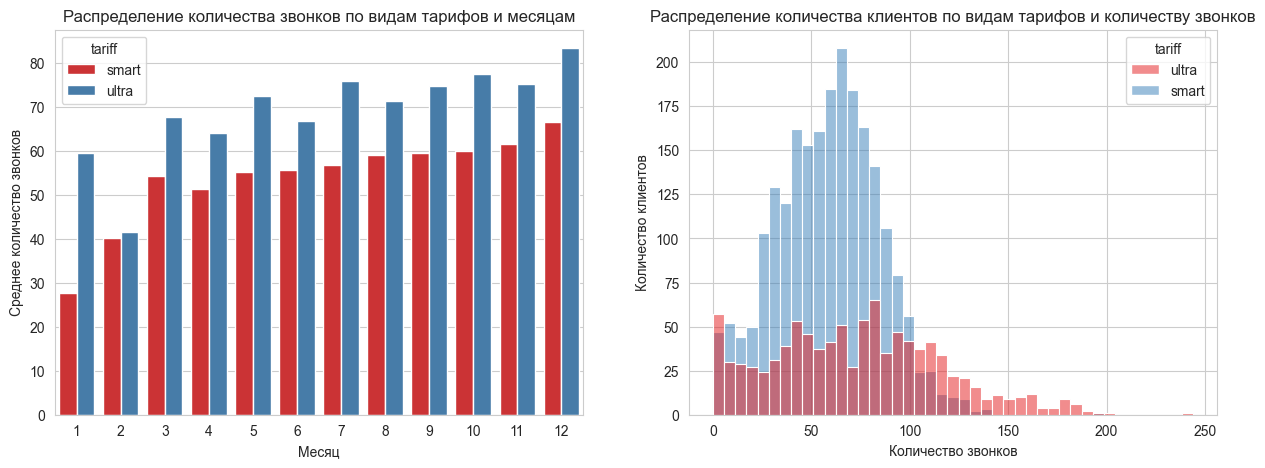

In [36]:
plots(stats_df,
      user_behavior,
      x1='month',
      y1='calls_mean',
      x2='calls',
      title1='Распределение количества звонков по видам тарифов и месяцам',
      title2='Распределение количества клиентов по видам тарифов и количеству звонков',
      xlabel1='Месяц',
      ylabel1='Среднее количество звонков',
      xlabel2='Количество звонков',
      ylabel2='Количество клиентов')

### Продолжительность звонков

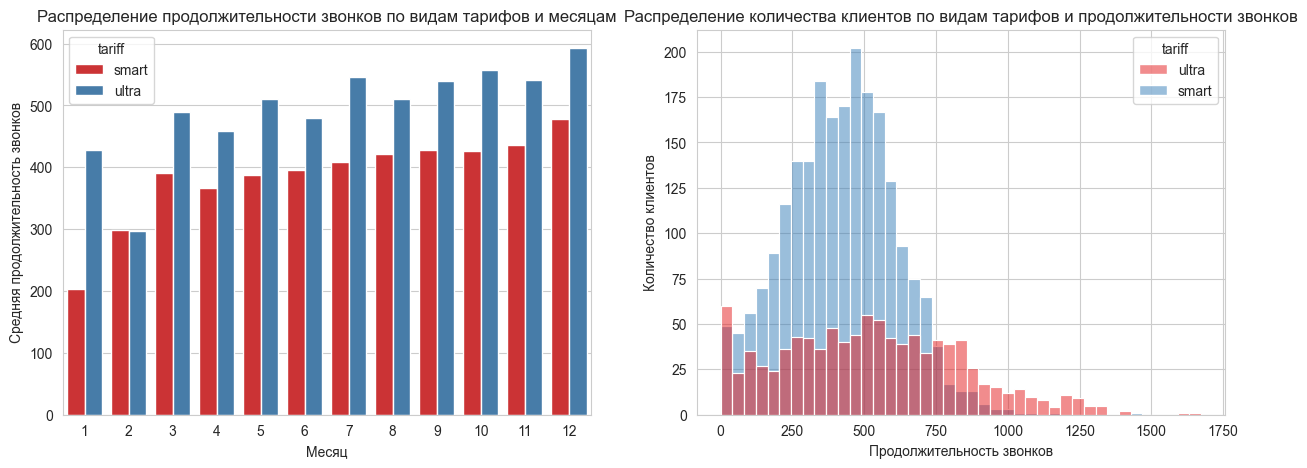

In [37]:
plots(stats_df,
      user_behavior,
      x1='month',
      y1='minutes_mean',
      x2='minutes',
      title1='Распределение продолжительности звонков по видам тарифов и месяцам',
      title2='Распределение количества клиентов по видам тарифов и продолжительности звонков',
      xlabel1='Месяц',
      ylabel1='Средняя продолжительность звонков',
      xlabel2='Продолжительность звонков',
      ylabel2='Количество клиентов')

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

### Количество сообщений

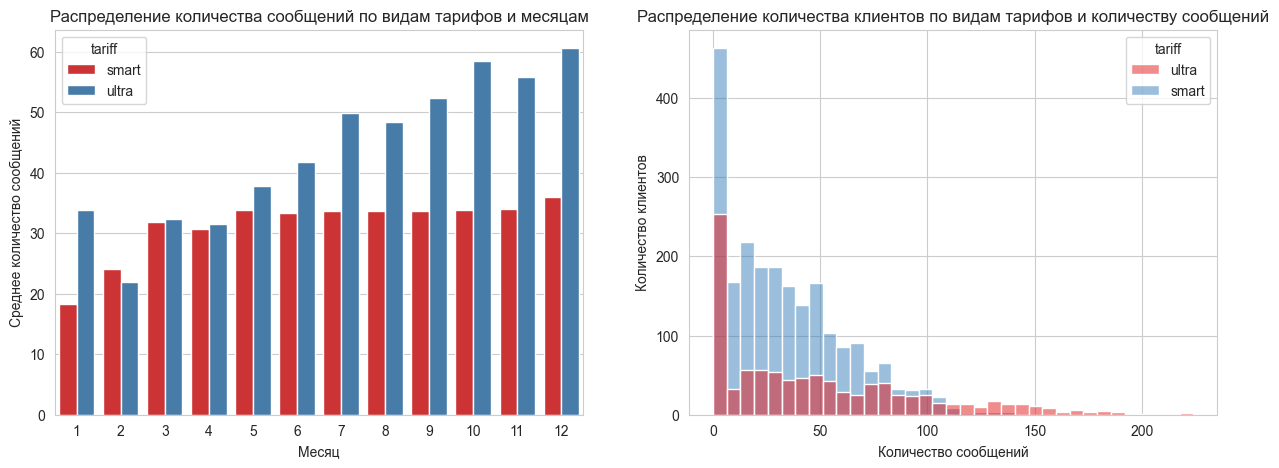

In [38]:
plots(stats_df,
      user_behavior,
      x1='month',
      y1='messages_mean',
      x2='messages',
      title1='Распределение количества сообщений по видам тарифов и месяцам',
      title2='Распределение количества клиентов по видам тарифов и количеству сообщений',
      xlabel1='Месяц',
      ylabel1='Среднее количество сообщений',
      xlabel2='Количество сообщений',
      ylabel2='Количество клиентов')

В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

### Количество потраченного трафика

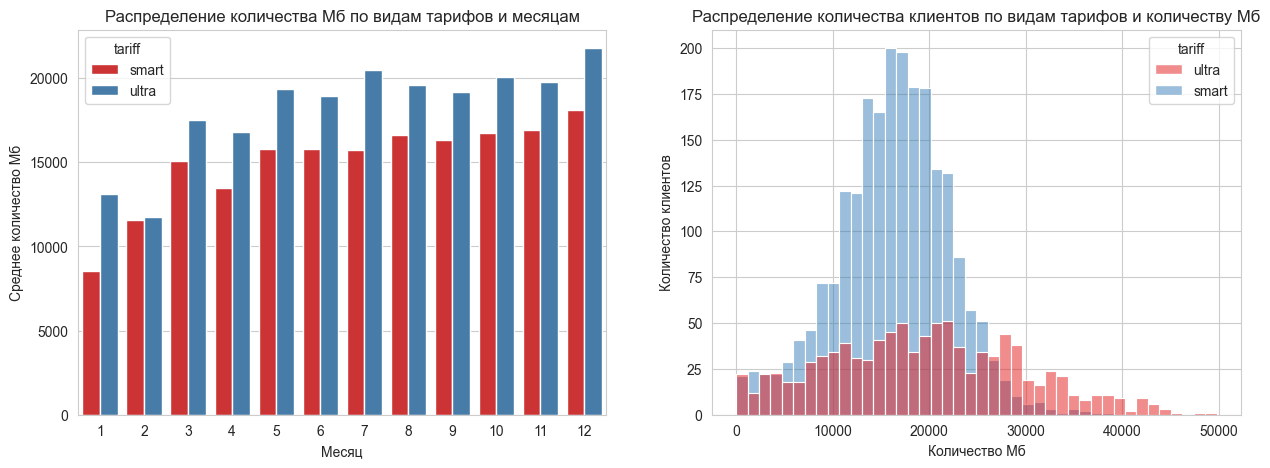

In [39]:
plots(stats_df,
      user_behavior,
      x1='month',
      y1='sessions_mean',
      x2='mb_used',
      title1='Распределение количества Мб по видам тарифов и месяцам',
      title2='Распределение количества клиентов по видам тарифов и количеству Мб',
      xlabel1='Месяц',
      ylabel1='Среднее количество Мб',
      xlabel2='Количество Мб',
      ylabel2='Количество клиентов')

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 ГБ.

## Проверка гипотез

Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"
H_1 Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"
alpha = 0.05
```

In [40]:
results = st.ttest_ind(user_behavior[user_behavior['tariff'] =='smart']['total_cost'], user_behavior[user_behavior['tariff'] =='ultra']['total_cost'], equal_var=False)

alpha = 0.05 # задайте значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом


p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Проверка гипотезы: средняя выручка с пользователей из Москвы отличается от выручки c пользователей других регионов; 

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы
alpha = 0.05
```

In [41]:
results = st.ttest_ind(user_behavior[user_behavior['city'] =='Москва']['total_cost'], user_behavior[user_behavior['city'] !='Москва']['total_cost'], equal_var=False)

alpha = 0.05 

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


## Общие выводы

**1. Предобработка данных**  
  
- В столбцах `users['reg_date']`, `users['churn_date']`, `calls['call_date']`, `messages['message_date']`, `sessions['session_date']` преобразован тип данных на `datetime`  
- Значения в столбце `calls['duration']` округлил до целого числа вверх и привел тип данных к `int`  
- Удалил столбец `Unnamed : 0` из датафрейма `sessions`  
- В датафреймы `calls`, `messages` и `sessions` добавил столбец `month` с номером месяца  
- Создал датафрейм `user_behavior`, в котором для каждой пары «пользователь — месяц» доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах  
  
**2. Исследовательский анализ**  
  
- Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели  
- В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику  
- Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 ГБ  
  
**3. Проверка гипотез**  

*Гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается*

    H_0: Выручка пользователей "Ультра" = выручка пользователей "Смарт"  
    H_1: Выручка пользователей "Ультра" ≠ выручка пользователей "Смарт"  
    alpha = 0.05  
p-значение: 4.2606313931076085e-250  
Отвергаем нулевую гипотезу  
  
*Гипотеза 2: средняя выручка пользователей из Москвы отличается от выручки c пользователей других регионов*

    H_0: Выручка пользователей из Москвы = выручка пользователей не из Москвы  
    H_1: Выручка пользователей из Москвы ≠ выручка пользователей не из Москвы  
    alpha = 0.05  
p-значение: 0.5257376663729298  
Не получилось отвергнуть нулевую гипотезу